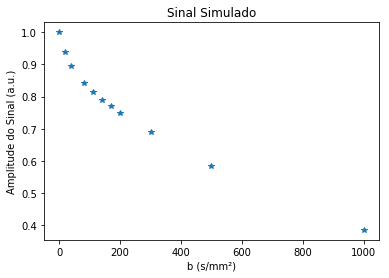

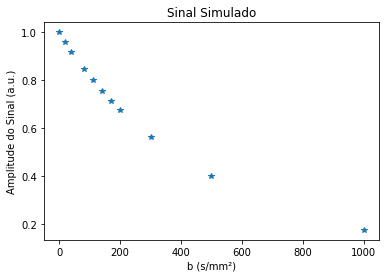

d: 0.000832 de: 0.0268 f: 0.115
d: 0.00163 de: 0.00723 f: 0.0953


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import random

#b = [0, 10, 20, 30, 40, 50, 100, 200, 400, 800]
b = [0, 20, 40, 80, 110, 140, 170, 200, 300, 500, 1000]

def plotCurve(d, de, f):
    sinalF = []
    for element in b:
        sinalF.append(f*np.exp(-element*de) + (1-f)*np.exp(-element*d))
    #plt.plot(b, sinal/sinal[0], ".-")
    plt.plot(b, sinalF/sinalF[0], "*")
    plt.title('Sinal Simulado')
    plt.xlabel('b (s/mm²)')
    plt.ylabel('Amplitude do Sinal (a.u.)')
    plt.show()
    
def plotCurveR(d, de, f):
    sinalF = []
    for element in b:
        sinalF.append(f*np.exp(-element*de) + (1-f)*np.exp(-element*d))
    plt.plot(b, sinalF/sinalF[0], ".-")
    plt.plot(b, sinalR/sinalR[0], "*")
    plt.show()
    
#d = .0011
#de = 0.85
#f = 0.26

# Saudável
d = .000832
de = 0.0268
f = 0.115

# Com Tumor
dT = 0.00163
deT = 0.00723 
fT = 0.0953

dT = d - (d - dT)*(4/4)
deT = de - (de - deT)*(4/4)
fT = f - (f - fT)*(4/4)

random.seed()
a = random.gauss(0.6, 0.1)
    
sinal = []
for element in b:
    sinal.append(a*(f*np.exp(-element*de) + (1-f)*np.exp(-element*d)))
    
sinalT = []
for element in b:
    sinalT.append(a*(fT*np.exp(-element*deT) + (1-fT)*np.exp(-element*dT)))
    
sinal = sinal/sinal[0]
sinalT = sinalT/sinalT[0]
    
plotCurve(d, de, f)
plotCurve(dT, deT, fT)

print('d:', d, 'de:', de, 'f:', f)
print('d:', dT, 'de:', deT, 'f:', fT)

# 0 Ruído

Riciano:  30.976220546409476


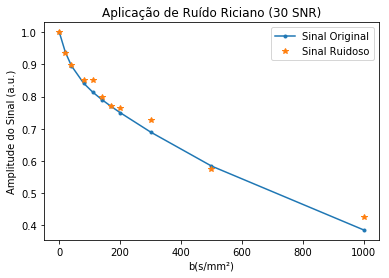

In [2]:
#Definição de SNR
#SNRs = [20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70]
SNRs = [65, 70]
SNR = 30
meanSNR = 0

def getSNR(signal, noise):
    #mean = np.mean(signal)
    #sd = np.std(noise)
    sumS = 0
    sumN = 0
    for i in range(len(signal)):
        sumS += signal[i]*signal[i]
        sumN += noise[i]*noise[i]
    return (10*np.log10(sumS/sumN))

# Ruído Riciano
def createRiciT(SNR):
    global meanSNR
    sd = np.mean(sinalT)/(10**(SNR/(20*0.9)))
    
    noise = ((np.random.normal(0, sd, len(sinalT)))**2 + (np.random.normal(0, sd, len(sinalT)))**2)**0.5
    noise = np.absolute(noise)
    sinalR = sinalT + noise
    
    SNR = getSNR(sinalR, noise)
    meanSNR += SNR/1000
    #print(SNR)
    return sinalR

# Ruído Riciano
def createRici(SNR):
    global meanSNR
    sd = np.mean(sinal)/(10**(SNR/(20*0.9)))
    
    noise = ((np.random.normal(0, sd, len(sinal)))**2 + (np.random.normal(0, sd, len(sinal)))**2)**0.5
    noise = np.absolute(noise)
    sinalR = sinal + noise
    
    SNR = getSNR(sinalR, noise)
    meanSNR += SNR/1000
    #print(SNR)
    return sinalR

# Ruído Gaussiano
def createRui(SNR):
    global meanSNR
    sd = np.mean(sinal)/(10**(SNR/20))
    #print(sd)
    noise = np.random.normal(0, sd, len(sinal))
    sinalR = sinal + noise
    
    SNR = getSNR(sinalR, noise)
    #print(SNR)
    meanSNR += SNR/1000
    return sinalR

meanSNR = 0
for k in range(1000):
    sinalR1 = createRici(SNR)
print("Riciano: ",meanSNR)

meanSNR = 0
for k in range(1000):
    sinalR2 = createRui(SNR)
#print("Gaussiano: ", meanSNR)

plt.plot(b, sinal/sinal[0], ".-")
plt.plot(b, sinalR1/sinalR1[0], "*")
plt.title('Aplicação de Ruído Riciano (' + str(SNR) +' SNR)')
plt.xlabel('b(s/mm²)')
plt.ylabel('Amplitude do Sinal (a.u.)')
plt.gca().legend(('Sinal Original','Sinal Ruidoso'))
#pylab.legend(loc='upper right')

#plt.plot(b, sinalR2/sinalR2[0], "o")

# 1- Expansão em Fourier sem ruído

a0: 0.681647092973912
a1: 0.007308484859277113
a2: 0.007782790706947369
a3: 0.010330428592199127
a4: 0.22305107317396822
b1: 0.009535745258632176
b2: 0.0514653718805053
b3: 0.14440433397022778
b4: 0.081073541074483


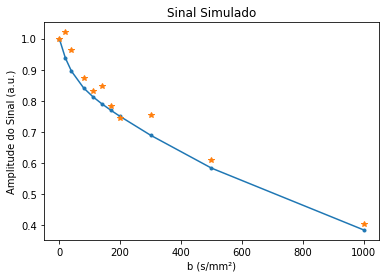

a0: 0.5783506453179016
a1: 0.015513470049747614
a2: 0.008965834684242734
a3: 0.01638833353917954
a4: 0.32017780975791776
b1: 0.014054487694329288
b2: 0.06340128820353161
b3: 0.1756641823354482
b4: 0.12778341367723414


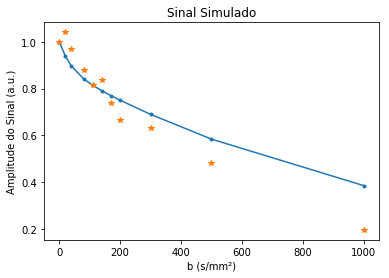

In [3]:
from lmfit import Minimizer, Parameters, report_fit

freq1 = 70
freq2 = freq1*2
freq3 = freq2*2
freq4 = freq3*2

def plotCurve3(a0, a1, a2, a3, a4, b1, b2, b3, b4):
    sinalF = []
    for x in b:
        sinalF.append( a0 + (a1)*np.sin(x * 2*np.pi/freq1) + (a2)*np.sin(x * 2*np.pi/freq2) + (a3)*np.sin(x * 2*np.pi/freq3) + a4*np.sin(x*2*np.pi/freq4) +
                      (b1)*np.cos(x * 2*np.pi/freq1) + (b2)*np.cos(x * 2*np.pi/freq2) + (b3)*np.cos(x * 2*np.pi/freq3) + b4*np.cos(x*2*np.pi/freq4))
    plt.plot(b, sinal/sinal[0], ".-")
    plt.plot(b, sinalF/sinalF[0], "*")
    plt.title('Sinal Simulado')
    plt.xlabel('b (s/mm²)')
    plt.ylabel('Amplitude do Sinal (a.u.)')
    plt.show()

def func5(params, x, data):
    a0 = params['a0']
    a1 = params['a1']
    a2 = params['a2']
    a3 = params['a3']
    a4 = params['a4']
    b1 = params['b1']
    b2 = params['b2']
    b3 = params['b3']
    b4 = params['b4']
    model = (a0 + (a1)*np.sin(x * 2*np.pi/freq1) + (a2)*np.sin(x * 2*np.pi/freq2) + (a3)*np.sin(x * 2*np.pi/freq3) + (a4)*np.sin(x * 2*np.pi/freq4) +
             (b1)*np.cos(x * 2*np.pi/freq1) + (b2)*np.cos(x * 2*np.pi/freq2) + (b3)*np.cos(x * 2*np.pi/freq3) + (b4)*np.cos(x * 2*np.pi/freq4))
    return (model - data)

data = np.empty(0)
x = np.empty(0)

for i in range(0,11):
    data = np.append(data, sinal[i])
    x = np.append(x, b[i])

# Tem problematização na inicialização dos parametros    
params = Parameters()
params.add('a0', value=0)
params.add('a1', value=0)
params.add('a2', value=0)
params.add('a3', value=0)
params.add('a4', value=0)
params.add('b1', value=0)
params.add('b2', value=0)
params.add('b3', value=0)
params.add('b4', value=0)
    
minner = Minimizer(func5, params, fcn_args=(x, data))
estR = minner.minimize()
a0Est = abs(estR.params['a0'].value)
a1Est = abs(estR.params['a1'].value)
a2Est = abs(estR.params['a2'].value)
a3Est = abs(estR.params['a3'].value)
a4Est = abs(estR.params['a4'].value)
b1Est = abs(estR.params['b1'].value)
b2Est = abs(estR.params['b2'].value)
b3Est = abs(estR.params['b3'].value)
b4Est = abs(estR.params['b4'].value)

print("a0: " + str(a0Est))
print("a1: " + str(a1Est))
print("a2: " + str(a2Est))
print("a3: " + str(a3Est))
print("a4: " + str(a4Est))
print("b1: " + str(b1Est))
print("b2: " + str(b2Est))
print("b3: " + str(b3Est))
print("b4: " + str(b4Est))

# Curva original
#plotCurve(d, de, f)

# Curva obtida
plotCurve3(a0Est, a1Est, a2Est, a3Est, a4Est, b1Est, b2Est, b3Est, b4Est)

data = np.empty(0)
x = np.empty(0)

for i in range(0,11):
    data = np.append(data, sinalT[i])
    x = np.append(x, b[i])

# Tem problematização na inicialização dos parametros    
params = Parameters()
params.add('a0', value=0)
params.add('a1', value=0)
params.add('a2', value=0)
params.add('a3', value=0)
params.add('a4', value=0)
params.add('b1', value=0)
params.add('b2', value=0)
params.add('b3', value=0)
params.add('b4', value=0)
    
minner = Minimizer(func5, params, fcn_args=(x, data))
estR = minner.minimize()
a0Est = abs(estR.params['a0'].value)
a1Est = abs(estR.params['a1'].value)
a2Est = abs(estR.params['a2'].value)
a3Est = abs(estR.params['a3'].value)
a4Est = abs(estR.params['a4'].value)
b1Est = abs(estR.params['b1'].value)
b2Est = abs(estR.params['b2'].value)
b3Est = abs(estR.params['b3'].value)
b4Est = abs(estR.params['b4'].value)

print("a0: " + str(a0Est))
print("a1: " + str(a1Est))
print("a2: " + str(a2Est))
print("a3: " + str(a3Est))
print("a4: " + str(a4Est))
print("b1: " + str(b1Est))
print("b2: " + str(b2Est))
print("b3: " + str(b3Est))
print("b4: " + str(b4Est))

# Curva original
#plotCurve(d, de, f)

# Curva obtida
plotCurve3(a0Est, a1Est, a2Est, a3Est, a4Est, b1Est, b2Est, b3Est, b4Est)

# 3- Modelo com Ruído (Estatístico)

In [4]:
erroVec3 = list()
a0prg = list()
a1prg = list()
a2prg = list()
a3prg = list()
a4prg = list()
b1prg = list()
b2prg = list()
b3prg = list()
b4prg = list()

execucoes = 100

for SNR in SNRs[1:]:
    a0pr = np.empty(0)
    a1pr = np.empty(0)
    a2pr = np.empty(0)
    a3pr = np.empty(0)
    a4pr = np.empty(0)
    b1pr = np.empty(0)
    b2pr = np.empty(0)
    b3pr = np.empty(0)
    b4pr = np.empty(0)

    errom = 0;
    k = 0
    nconv = 0
    success = True
    while (k <= execucoes):
        try:
            sinalR = createRici(SNR)
            sinalR = sinalR/sinalR[0]

            data = np.empty(0)
            x = np.empty(0)

            for i in range(0,11):
                data = np.append(data, sinalR[i])
                x = np.append(x, b[i])

            params = Parameters()
            params.add('a0', value=0)
            params.add('a1', value=0)
            params.add('a2', value=0)
            params.add('a3', value=0)
            params.add('a4', value=0)
            params.add('b1', value=0)
            params.add('b2', value=0)
            params.add('b3', value=0)
            params.add('b4', value=0)

            minner = Minimizer(func5, params, fcn_args=(x, data))
            # Convergencia em leastsq, tnc, trust-exact, trust-krylov, trust-constr
            estR = minner.minimize()
            a0Est = abs(estR.params['a0'].value)
            a1Est = abs(estR.params['a1'].value)
            a2Est = abs(estR.params['a2'].value)
            a3Est = abs(estR.params['a3'].value)
            a4Est = abs(estR.params['a4'].value)
            b1Est = abs(estR.params['b1'].value)
            b2Est = abs(estR.params['b2'].value)
            b3Est = abs(estR.params['b3'].value)
            b4Est = abs(estR.params['b4'].value)
            
            a0pr = np.append(a0pr, a0Est)
            a1pr = np.append(a1pr, a1Est)
            a2pr = np.append(a2pr, a2Est)
            a3pr = np.append(a3pr, a3Est)
            a4pr = np.append(a4pr, a4Est)
            b1pr = np.append(b1pr, b1Est)
            b2pr = np.append(b2pr, b2Est)
            b3pr = np.append(b3pr, b3Est)
            b4pr = np.append(b4pr, b4Est)

            k = k + 1
            # Calcular erro
            sinalPlot = []
            for x in b:
                sinalPlot.append( a0Est + (a1Est)*np.sin(x * 2*np.pi/freq1) + (a2Est)*np.sin(x * 2*np.pi/freq2) + (a3Est)*np.sin(x * 2*np.pi/freq3) + a4Est*np.sin(x*2*np.pi/freq4) +
                      (b1Est)*np.cos(x * 2*np.pi/freq1) + (b2Est)*np.cos(x * 2*np.pi/freq2) + (b3Est)*np.cos(x * 2*np.pi/freq3) + b4Est*np.cos(x*2*np.pi/freq4))
                
            erro = 0
            for i in range(len(sinal)):
                erro = erro + abs(sinal[i]-sinalPlot[i])
                
            errom = errom + erro/execucoes
            
        except:
            nconv = nconv + 1
            if(nconv > execucoes):
                print("Não houve convergência em mais de 50% dos casos. Parando a execução.\n")
                print("Execuções bem sucedidas: " + str(k))
                success = False;
                break

    a0prg.append(a0pr)
    a1prg.append(a1pr)
    a2prg.append(a2pr)
    a3prg.append(a3pr)
    a4prg.append(a4pr)
    b1prg.append(b1pr)
    b2prg.append(b2pr)
    b3prg.append(b3pr)
    b4prg.append(b4pr)
    print("Com SNR = ", SNR)

    if (success):
        erroVec3.append(errom)
       # print("Erro: ", errom)

       # print("1 - Parâmetro 'a0': Média ("+ str(np.mean(a0pr)) +")")
       # print("2 - Parâmetro 'a1': Média ("+ str(np.mean(a1pr)) +")")
       # print("3 - Parâmetro 'a2': Média ("+ str(np.mean(a2pr)) +")")
       # print("4 - Parâmetro 'a3': Média ("+ str(np.mean(a3pr)) +")")
       # print("5 - Parâmetro 'b1': Média ("+ str(np.mean(b1pr)) +")")
       # print("6 - Parâmetro 'b2': Média ("+ str(np.mean(b2pr)) +")")
       # print("7 - Parâmetro 'b3': Média ("+ str(np.mean(b3pr)) +")")
       # print("8 - Parâmetro 'b4': Média ("+ str(np.mean(b4pr)) +")")
        
        print("1 - Parâmetro 'a0': Mediana ("+ str(np.median(a0pr)) +")")
        print("2 - Parâmetro 'a1': Mediana ("+ str(np.median(a1pr)) +")")
        print("3 - Parâmetro 'a2': Mediana ("+ str(np.median(a2pr)) +")")
        print("4 - Parâmetro 'a3': Mediana ("+ str(np.median(a3pr)) +")")
        print("5 - Parâmetro 'b1': Mediana ("+ str(np.median(b1pr)) +")")
        print("6 - Parâmetro 'b2': Mediana ("+ str(np.median(b2pr)) +")")
        print("7 - Parâmetro 'b3': Mediana ("+ str(np.median(b3pr)) +")")
        print("8 - Parâmetro 'b4': Mediana ("+ str(np.median(b4pr)) +")")

       # print("Não houve convergência em " + str(nconv/(nconv + 1000)) + "% dos casos.")

Com SNR =  70
1 - Parâmetro 'a0': Mediana (0.6816796624294863)
2 - Parâmetro 'a1': Mediana (0.007301553997226704)
3 - Parâmetro 'a2': Mediana (0.0077945563224302425)
4 - Parâmetro 'a3': Mediana (0.010327924266631323)
5 - Parâmetro 'b1': Mediana (0.009534837047317326)
6 - Parâmetro 'b2': Mediana (0.05145989225825066)
7 - Parâmetro 'b3': Mediana (0.1443865734778885)
8 - Parâmetro 'b4': Mediana (0.08106221076780193)


In [5]:
erroVec3T = list()
a0prgT = list()
a1prgT = list()
a2prgT = list()
a3prgT = list()
a4prgT = list()
b1prgT = list()
b2prgT = list()
b3prgT = list()
b4prgT = list()

execucoes = 100

for SNR in SNRs[1:]:
    a0pr = np.empty(0)
    a1pr = np.empty(0)
    a2pr = np.empty(0)
    a3pr = np.empty(0)
    a4pr = np.empty(0)
    b1pr = np.empty(0)
    b2pr = np.empty(0)
    b3pr = np.empty(0)
    b4pr = np.empty(0)

    errom = 0;
    k = 0
    nconv = 0
    success = True
    while (k <= execucoes):
        try:
            sinalR = createRiciT(SNR)
            sinalR = sinalR/sinalR[0]

            data = np.empty(0)
            x = np.empty(0)

            for i in range(0,11):
                data = np.append(data, sinalR[i])
                x = np.append(x, b[i])

            params = Parameters()
            params.add('a0', value=0)
            params.add('a1', value=0)
            params.add('a2', value=0)
            params.add('a3', value=0)
            params.add('a4', value=0)
            params.add('b1', value=0)
            params.add('b2', value=0)
            params.add('b3', value=0)
            params.add('b4', value=0)

            minner = Minimizer(func5, params, fcn_args=(x, data))
            # Convergencia em leastsq, tnc, trust-exact, trust-krylov, trust-constr
            estR = minner.minimize()
            a0Est = abs(estR.params['a0'].value)
            a1Est = abs(estR.params['a1'].value)
            a2Est = abs(estR.params['a2'].value)
            a3Est = abs(estR.params['a3'].value)
            a4Est = abs(estR.params['a4'].value)
            b1Est = abs(estR.params['b1'].value)
            b2Est = abs(estR.params['b2'].value)
            b3Est = abs(estR.params['b3'].value)
            b4Est = abs(estR.params['b4'].value)
            
            a0pr = np.append(a0pr, a0Est)
            a1pr = np.append(a1pr, a1Est)
            a2pr = np.append(a2pr, a2Est)
            a3pr = np.append(a3pr, a3Est)
            a4pr = np.append(a4pr, a4Est)
            b1pr = np.append(b1pr, b1Est)
            b2pr = np.append(b2pr, b2Est)
            b3pr = np.append(b3pr, b3Est)
            b4pr = np.append(b4pr, b4Est)

            k = k + 1
            # Calcular erro
            sinalPlot = []
            for x in b:
                sinalPlot.append( a0Est + (a1Est)*np.sin(x * 2*np.pi/freq1) + (a2Est)*np.sin(x * 2*np.pi/freq2) + (a3Est)*np.sin(x * 2*np.pi/freq3) + a4Est*np.sin(x*2*np.pi/freq4) +
                      (b1Est)*np.cos(x * 2*np.pi/freq1) + (b2Est)*np.cos(x * 2*np.pi/freq2) + (b3Est)*np.cos(x * 2*np.pi/freq3) + b4Est*np.cos(x*2*np.pi/freq4))
                
            erro = 0
            for i in range(len(sinal)):
                erro = erro + abs(sinal[i]-sinalPlot[i])
                
            errom = errom + erro/execucoes
            
        except:
            nconv = nconv + 1
            if(nconv > execucoes):
                print("Não houve convergência em mais de 50% dos casos. Parando a execução.\n")
                print("Execuções bem sucedidas: " + str(k))
                success = False;
                break

    a0prgT.append(a0pr)
    a1prgT.append(a1pr)
    a2prgT.append(a2pr)
    a3prgT.append(a3pr)
    a4prgT.append(a4pr)
    b1prgT.append(b1pr)
    b2prgT.append(b2pr)
    b3prgT.append(b3pr)
    b4prgT.append(b4pr)
    print("\n")

    if (success):
        erroVec3T.append(errom)
       # print("Erro: ", errom)

       # print("1 - Parâmetro 'a0': Média ("+ str(np.mean(a0pr)) +")")
       # print("2 - Parâmetro 'a1': Média ("+ str(np.mean(a1pr)) +")")
       # print("3 - Parâmetro 'a2': Média ("+ str(np.mean(a2pr)) +")")
       # print("4 - Parâmetro 'a3': Média ("+ str(np.mean(a3pr)) +")")
       # print("5 - Parâmetro 'b1': Média ("+ str(np.mean(b1pr)) +")")
       # print("6 - Parâmetro 'b2': Média ("+ str(np.mean(b2pr)) +")")
       # print("7 - Parâmetro 'b3': Média ("+ str(np.mean(b3pr)) +")")
       # print("8 - Parâmetro 'b4': Média ("+ str(np.mean(b4pr)) +")")
        
        print("1 - Parâmetro 'a0': Mediana ("+ str(np.median(a0pr)) +")")
        print("2 - Parâmetro 'a1': Mediana ("+ str(np.median(a1pr)) +")")
        print("3 - Parâmetro 'a2': Mediana ("+ str(np.median(a2pr)) +")")
        print("4 - Parâmetro 'a3': Mediana ("+ str(np.median(a3pr)) +")")
        print("5 - Parâmetro 'b1': Mediana ("+ str(np.median(b1pr)) +")")
        print("6 - Parâmetro 'b2': Mediana ("+ str(np.median(b2pr)) +")")
        print("7 - Parâmetro 'b3': Mediana ("+ str(np.median(b3pr)) +")")
        print("8 - Parâmetro 'b4': Mediana ("+ str(np.median(b4pr)) +")")

       # print("Não houve convergência em " + str(nconv/(nconv + 1000)) + "% dos casos.")



1 - Parâmetro 'a0': Mediana (0.5783977814607465)
2 - Parâmetro 'a1': Mediana (0.015513244082499588)
3 - Parâmetro 'a2': Mediana (0.008962422731369532)
4 - Parâmetro 'a3': Mediana (0.016390316918063908)
5 - Parâmetro 'b1': Mediana (0.014052965692217017)
6 - Parâmetro 'b2': Mediana (0.06339543532882942)
7 - Parâmetro 'b3': Mediana (0.1756479421238756)
8 - Parâmetro 'b4': Mediana (0.12776671305496)


In [6]:
# Saudável
d = .000832
de = 0.0268
f = 0.115

# Com Tumor
dT = 0.00163
deT = 0.00723
fT = 0.0953

fs = []
des = []
ds = []
maxi = 10

for i in range(0,maxi+1):
    fs.append((f - (f-fT)*(i/maxi)))
    des.append((de - (de-deT)*(i/maxi)))
    ds.append((d - (d-dT)*(i/maxi)))
    
print(fs)
print(des)
print(ds)

[0.115, 0.11303, 0.11106, 0.10909, 0.10712, 0.10515, 0.10318, 0.10121, 0.09924, 0.09727, 0.0953]
[0.0268, 0.024843, 0.022886, 0.020929, 0.018972000000000003, 0.017015000000000002, 0.015058, 0.013101000000000002, 0.011144000000000001, 0.009187, 0.00723]
[0.000832, 0.0009117999999999999, 0.0009916, 0.0010714, 0.0011512, 0.0012309999999999999, 0.0013108, 0.0013905999999999999, 0.0014704, 0.0015501999999999998, 0.00163]


In [7]:
# Saudável
d = .000832
de = 0.0268
f = 0.115

# Com Tumor
dT = 0.00163
deT = 0.00723
fT = 0.0953

a0sf = []
a1sf = []
a2sf = []
a3sf = []
a4sf = []
b1sf = []
b2sf = []
b3sf = []
b4sf = []

a0sfT = []
a1sfT = []
a2sfT = []
a3sfT = []
a4sfT = []
b1sfT = []
b2sfT = []
b3sfT = []
b4sfT = []

for f in fs:
    sinal = []
    sinalT = []
    for element in b:
        sinal.append(a*(f*np.exp(-element*de) + (1-f)*np.exp(-element*d)))

    erroVec3 = list()
    a0prg = list()
    a1prg = list()
    a2prg = list()
    a3prg = list()
    a4prg = list()
    b1prg = list()
    b2prg = list()
    b3prg = list()
    b4prg = list()

    execucoes = 100

    for SNR in SNRs[1:]:
        a0pr = np.empty(0)
        a1pr = np.empty(0)
        a2pr = np.empty(0)
        a3pr = np.empty(0)
        a4pr = np.empty(0)
        b1pr = np.empty(0)
        b2pr = np.empty(0)
        b3pr = np.empty(0)
        b4pr = np.empty(0)

        errom = 0;
        k = 0
        nconv = 0
        success = True
        while (k <= execucoes):
            try:
                sinalR = createRici(SNR)
                sinalR = sinalR/sinalR[0]

                data = np.empty(0)
                x = np.empty(0)

                for i in range(0,11):
                    data = np.append(data, sinalR[i])
                    x = np.append(x, b[i])

                params = Parameters()
                params.add('a0', value=0)
                params.add('a1', value=0)
                params.add('a2', value=0)
                params.add('a3', value=0)
                params.add('a4', value=0)
                params.add('b1', value=0)
                params.add('b2', value=0)
                params.add('b3', value=0)
                params.add('b4', value=0)

                minner = Minimizer(func5, params, fcn_args=(x, data))
                # Convergencia em leastsq, tnc, trust-exact, trust-krylov, trust-constr
                estR = minner.minimize()
                a0Est = abs(estR.params['a0'].value)
                a1Est = abs(estR.params['a1'].value)
                a2Est = abs(estR.params['a2'].value)
                a3Est = abs(estR.params['a3'].value)
                a4Est = abs(estR.params['a4'].value)
                b1Est = abs(estR.params['b1'].value)
                b2Est = abs(estR.params['b2'].value)
                b3Est = abs(estR.params['b3'].value)
                b4Est = abs(estR.params['b4'].value)

                a0pr = np.append(a0pr, a0Est)
                a1pr = np.append(a1pr, a1Est)
                a2pr = np.append(a2pr, a2Est)
                a3pr = np.append(a3pr, a3Est)
                a4pr = np.append(a4pr, a4Est)
                b1pr = np.append(b1pr, b1Est)
                b2pr = np.append(b2pr, b2Est)
                b3pr = np.append(b3pr, b3Est)
                b4pr = np.append(b4pr, b4Est)

                k = k + 1
                # Calcular erro
                sinalPlot = []
                for x in b:
                    sinalPlot.append( a0Est + (a1Est)*np.sin(x * 2*np.pi/freq1) + (a2Est)*np.sin(x * 2*np.pi/freq2) + (a3Est)*np.sin(x * 2*np.pi/freq3) + a4Est*np.sin(x*2*np.pi/freq4) +
                          (b1Est)*np.cos(x * 2*np.pi/freq1) + (b2Est)*np.cos(x * 2*np.pi/freq2) + (b3Est)*np.cos(x * 2*np.pi/freq3) + b4Est*np.cos(x*2*np.pi/freq4))

                erro = 0
                for i in range(len(sinal)):
                    erro = erro + abs(sinal[i]-sinalPlot[i])

                errom = errom + erro/execucoes

            except:
                nconv = nconv + 1
                if(nconv > execucoes):
                    print("Não houve convergência em mais de 50% dos casos. Parando a execução.\n")
                    print("Execuções bem sucedidas: " + str(k))
                    success = False;
                    break

        a0prg.append(a0pr)
        a1prg.append(a1pr)
        a2prg.append(a2pr)
        a3prg.append(a3pr)
        a4prg.append(a4pr)
        b1prg.append(b1pr)
        b2prg.append(b2pr)
        b3prg.append(b3pr)
        b4prg.append(b4pr)
        #print("Com SNR = ", SNR)

        if (success):
            erroVec3.append(errom)
           # print("Erro: ", errom)
            print('Storing for f = ', f)
           # print("1 - Parâmetro 'a0': Média ("+ str(np.mean(a0pr)) +")")
           # print("2 - Parâmetro 'a1': Média ("+ str(np.mean(a1pr)) +")")
           # print("3 - Parâmetro 'a2': Média ("+ str(np.mean(a2pr)) +")")
           # print("4 - Parâmetro 'a3': Média ("+ str(np.mean(a3pr)) +")")
           # print("5 - Parâmetro 'b1': Média ("+ str(np.mean(b1pr)) +")")
           # print("6 - Parâmetro 'b2': Média ("+ str(np.mean(b2pr)) +")")
           # print("7 - Parâmetro 'b3': Média ("+ str(np.mean(b3pr)) +")")
           # print("8 - Parâmetro 'b4': Média ("+ str(np.mean(b4pr)) +")")

            #print("1 - Parâmetro 'a0': Mediana ("+ str(np.median(a0pr)) +")")
            #print("2 - Parâmetro 'a1': Mediana ("+ str(np.median(a1pr)) +")")
            #print("3 - Parâmetro 'a2': Mediana ("+ str(np.median(a2pr)) +")")
            #print("4 - Parâmetro 'a3': Mediana ("+ str(np.median(a3pr)) +")")
            #print("4 - Parâmetro 'a4': Mediana ("+ str(np.median(a4pr)) +")")
            #print("5 - Parâmetro 'b1': Mediana ("+ str(np.median(b1pr)) +")")
            #print("6 - Parâmetro 'b2': Mediana ("+ str(np.median(b2pr)) +")")
            #print("7 - Parâmetro 'b3': Mediana ("+ str(np.median(b3pr)) +")")
            #print("8 - Parâmetro 'b4': Mediana ("+ str(np.median(b4pr)) +")")

           # print("Não houve convergência em " + str(nconv/(nconv + 1000)) + "% dos casos.")
            a0sf.append(np.median(a0pr))
            a1sf.append(np.median(a1pr))
            a2sf.append(np.median(a2pr))
            a3sf.append(np.median(a3pr))
            a4sf.append(np.median(a4pr))
            b1sf.append(np.median(b1pr))
            b2sf.append(np.median(b2pr))
            b3sf.append(np.median(b3pr))
            b4sf.append(np.median(b4pr))
    
for f in fs:
    sinal = []
    sinalT = []
    for element in b:
        sinal.append(a*(f*np.exp(-element*deT) + (1-f)*np.exp(-element*dT)))

    erroVec3 = list()
    a0prg = list()
    a1prg = list()
    a2prg = list()
    a3prg = list()
    a4prg = list()
    b1prg = list()
    b2prg = list()
    b3prg = list()
    b4prg = list()

    execucoes = 100

    for SNR in SNRs[1:]:
        a0pr = np.empty(0)
        a1pr = np.empty(0)
        a2pr = np.empty(0)
        a3pr = np.empty(0)
        a4pr = np.empty(0)
        b1pr = np.empty(0)
        b2pr = np.empty(0)
        b3pr = np.empty(0)
        b4pr = np.empty(0)

        errom = 0;
        k = 0
        nconv = 0
        success = True
        while (k <= execucoes):
            try:
                sinalR = createRici(SNR)
                sinalR = sinalR/sinalR[0]

                data = np.empty(0)
                x = np.empty(0)

                for i in range(0,11):
                    data = np.append(data, sinalR[i])
                    x = np.append(x, b[i])

                params = Parameters()
                params.add('a0', value=0)
                params.add('a1', value=0)
                params.add('a2', value=0)
                params.add('a3', value=0)
                params.add('a4', value=0)
                params.add('b1', value=0)
                params.add('b2', value=0)
                params.add('b3', value=0)
                params.add('b4', value=0)

                minner = Minimizer(func5, params, fcn_args=(x, data))
                # Convergencia em leastsq, tnc, trust-exact, trust-krylov, trust-constr
                estR = minner.minimize()
                a0Est = abs(estR.params['a0'].value)
                a1Est = abs(estR.params['a1'].value)
                a2Est = abs(estR.params['a2'].value)
                a3Est = abs(estR.params['a3'].value)
                a4Est = abs(estR.params['a4'].value)
                b1Est = abs(estR.params['b1'].value)
                b2Est = abs(estR.params['b2'].value)
                b3Est = abs(estR.params['b3'].value)
                b4Est = abs(estR.params['b4'].value)

                a0pr = np.append(a0pr, a0Est)
                a1pr = np.append(a1pr, a1Est)
                a2pr = np.append(a2pr, a2Est)
                a3pr = np.append(a3pr, a3Est)
                a4pr = np.append(a4pr, a4Est)
                b1pr = np.append(b1pr, b1Est)
                b2pr = np.append(b2pr, b2Est)
                b3pr = np.append(b3pr, b3Est)
                b4pr = np.append(b4pr, b4Est)

                k = k + 1
                # Calcular erro
                sinalPlot = []
                for x in b:
                    sinalPlot.append( a0Est + (a1Est)*np.sin(x * 2*np.pi/freq1) + (a2Est)*np.sin(x * 2*np.pi/freq2) + (a3Est)*np.sin(x * 2*np.pi/freq3) + a4Est*np.sin(x*2*np.pi/freq4) +
                          (b1Est)*np.cos(x * 2*np.pi/freq1) + (b2Est)*np.cos(x * 2*np.pi/freq2) + (b3Est)*np.cos(x * 2*np.pi/freq3) + b4Est*np.cos(x*2*np.pi/freq4))

                erro = 0
                for i in range(len(sinal)):
                    erro = erro + abs(sinal[i]-sinalPlot[i])

                errom = errom + erro/execucoes

            except:
                nconv = nconv + 1
                if(nconv > execucoes):
                    print("Não houve convergência em mais de 50% dos casos. Parando a execução.\n")
                    print("Execuções bem sucedidas: " + str(k))
                    success = False;
                    break

        a0prg.append(a0pr)
        a1prg.append(a1pr)
        a2prg.append(a2pr)
        a3prg.append(a3pr)
        a4prg.append(a4pr)
        b1prg.append(b1pr)
        b2prg.append(b2pr)
        b3prg.append(b3pr)
        b4prg.append(b4pr)
        #print("Com SNR = ", SNR)

        if (success):
            erroVec3.append(errom)
           # print("Erro: ", errom)
            print('Storing for f = ', f)
           # print("1 - Parâmetro 'a0': Média ("+ str(np.mean(a0pr)) +")")
           # print("2 - Parâmetro 'a1': Média ("+ str(np.mean(a1pr)) +")")
           # print("3 - Parâmetro 'a2': Média ("+ str(np.mean(a2pr)) +")")
           # print("4 - Parâmetro 'a3': Média ("+ str(np.mean(a3pr)) +")")
           # print("5 - Parâmetro 'b1': Média ("+ str(np.mean(b1pr)) +")")
           # print("6 - Parâmetro 'b2': Média ("+ str(np.mean(b2pr)) +")")
           # print("7 - Parâmetro 'b3': Média ("+ str(np.mean(b3pr)) +")")
           # print("8 - Parâmetro 'b4': Média ("+ str(np.mean(b4pr)) +")")

            #print("1 - Parâmetro 'a0': Mediana ("+ str(np.median(a0pr)) +")")
            #print("2 - Parâmetro 'a1': Mediana ("+ str(np.median(a1pr)) +")")
            #print("3 - Parâmetro 'a2': Mediana ("+ str(np.median(a2pr)) +")")
            #print("4 - Parâmetro 'a3': Mediana ("+ str(np.median(a3pr)) +")")
            #print("4 - Parâmetro 'a4': Mediana ("+ str(np.median(a4pr)) +")")
            #print("5 - Parâmetro 'b1': Mediana ("+ str(np.median(b1pr)) +")")
            #print("6 - Parâmetro 'b2': Mediana ("+ str(np.median(b2pr)) +")")
            #print("7 - Parâmetro 'b3': Mediana ("+ str(np.median(b3pr)) +")")
            #print("8 - Parâmetro 'b4': Mediana ("+ str(np.median(b4pr)) +")")

           # print("Não houve convergência em " + str(nconv/(nconv + 1000)) + "% dos casos.")
            a0sfT.append(np.median(a0pr))
            a1sfT.append(np.median(a1pr))
            a2sfT.append(np.median(a2pr))
            a3sfT.append(np.median(a3pr))
            a4sfT.append(np.median(a4pr))
            b1sfT.append(np.median(b1pr))
            b2sfT.append(np.median(b2pr))
            b3sfT.append(np.median(b3pr))
            b4sfT.append(np.median(b4pr))
print('Values stored')

Storing for f =  0.115
Storing for f =  0.11303
Storing for f =  0.11106
Storing for f =  0.10909
Storing for f =  0.10712
Storing for f =  0.10515
Storing for f =  0.10318
Storing for f =  0.10121
Storing for f =  0.09924
Storing for f =  0.09727
Storing for f =  0.0953
Storing for f =  0.115
Storing for f =  0.11303
Storing for f =  0.11106
Storing for f =  0.10909
Storing for f =  0.10712
Storing for f =  0.10515
Storing for f =  0.10318
Storing for f =  0.10121
Storing for f =  0.09924
Storing for f =  0.09727
Storing for f =  0.0953
Values stored


Com d= 0.000832  e de= 0.0268
0.11046304562469877
0.11658058412561112


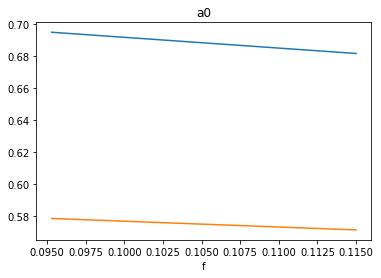

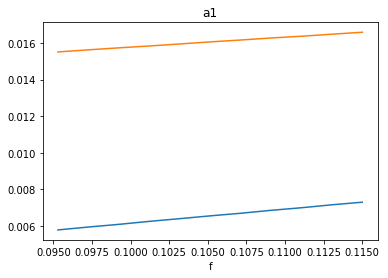

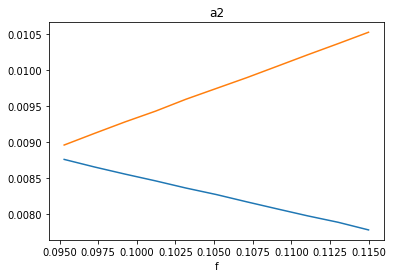

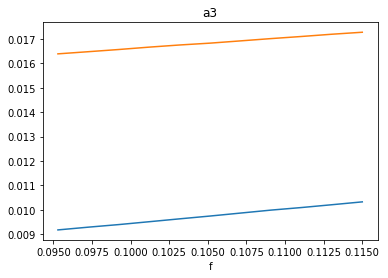

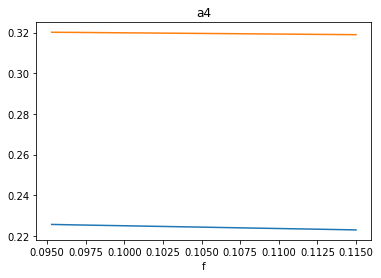

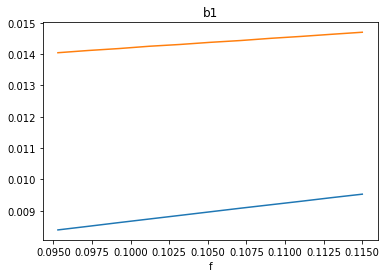

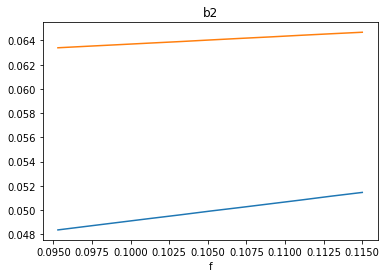

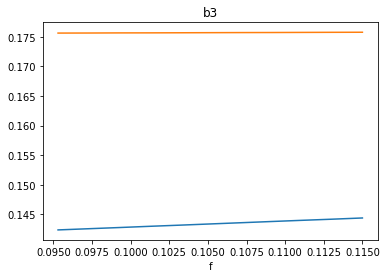

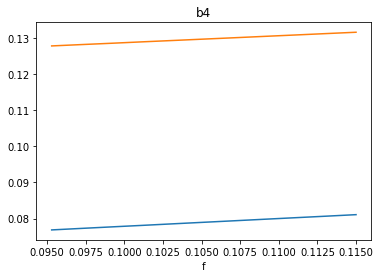

In [8]:
# Saudável
d = .000832
de = 0.0268
f = 0.115

# Com Tumor
dT = 0.00163
deT = 0.00723
fT = 0.0953

label = 'f'
print('Com d=', d, ' e de=', de)
lista = fs

plt.figure(), plt.plot(lista, a0sf)
plt.plot(lista, a0sfT)
plt.title('a0')
plt.xlabel(label)

plt.figure(), plt.plot(lista, a1sf)
plt.plot(lista, a1sfT)
plt.title('a1')
plt.xlabel(label)

plt.figure(), plt.plot(lista, a2sf)
plt.plot(lista, a2sfT)
plt.title('a2')
plt.xlabel(label)

plt.figure(), plt.plot(lista, a3sf)
plt.plot(lista, a3sfT)
plt.title('a3')
plt.xlabel(label)

plt.figure(), plt.plot(lista, a4sf)
plt.plot(lista, a4sfT)
plt.title('a4')
plt.xlabel(label)

plt.figure(), plt.plot(lista, b1sf)
plt.plot(lista, b1sfT)
plt.title('b1')
plt.xlabel(label)

plt.figure(), plt.plot(lista, b2sf)
plt.plot(lista, b2sfT)
plt.title('b2')
plt.xlabel(label)

plt.figure(), plt.plot(lista, b3sf)
plt.plot(lista, b3sfT)
plt.title('b3')
plt.xlabel(label)

plt.figure(), plt.plot(lista, b4sf)
plt.plot(lista, b4sfT)
plt.title('b4')
plt.xlabel(label)

print(a0sf[0] - a0sfT[0])
print(a0sf[-1] - a0sfT[-1])

In [9]:
# Saudável
d = .000832
de = 0.0268
f = 0.115

# Com Tumor
dT = 0.00163
deT = 0.00723
fT = 0.0953

a0sd = []
a1sd = []
a2sd = []
a3sd = []
a4sd = []
b1sd = []
b2sd = []
b3sd = []
b4sd = []

a0sdT = []
a1sdT = []
a2sdT = []
a3sdT = []
a4sdT = []
b1sdT = []
b2sdT = []
b3sdT = []
b4sdT = []

for d in ds:
    sinal = []
    for element in b:
        sinal.append(a*(f*np.exp(-element*de) + (1-f)*np.exp(-element*d)))

    erroVec3 = list()
    a0prg = list()
    a1prg = list()
    a2prg = list()
    a3prg = list()
    a4prg = list()
    b1prg = list()
    b2prg = list()
    b3prg = list()
    b4prg = list()

    execucoes = 100

    for SNR in SNRs[1:]:
        a0pr = np.empty(0)
        a1pr = np.empty(0)
        a2pr = np.empty(0)
        a3pr = np.empty(0)
        a4pr = np.empty(0)
        b1pr = np.empty(0)
        b2pr = np.empty(0)
        b3pr = np.empty(0)
        b4pr = np.empty(0)

        errom = 0;
        k = 0
        nconv = 0
        success = True
        while (k <= execucoes):
            try:
                sinalR = createRici(SNR)
                sinalR = sinalR/sinalR[0]

                data = np.empty(0)
                x = np.empty(0)

                for i in range(0,11):
                    data = np.append(data, sinalR[i])
                    x = np.append(x, b[i])

                params = Parameters()
                params.add('a0', value=0)
                params.add('a1', value=0)
                params.add('a2', value=0)
                params.add('a3', value=0)
                params.add('a4', value=0)
                params.add('b1', value=0)
                params.add('b2', value=0)
                params.add('b3', value=0)
                params.add('b4', value=0)

                minner = Minimizer(func5, params, fcn_args=(x, data))
                # Convergencia em leastsq, tnc, trust-exact, trust-krylov, trust-constr
                estR = minner.minimize()
                a0Est = abs(estR.params['a0'].value)
                a1Est = abs(estR.params['a1'].value)
                a2Est = abs(estR.params['a2'].value)
                a3Est = abs(estR.params['a3'].value)
                a4Est = abs(estR.params['a4'].value)
                b1Est = abs(estR.params['b1'].value)
                b2Est = abs(estR.params['b2'].value)
                b3Est = abs(estR.params['b3'].value)
                b4Est = abs(estR.params['b4'].value)

                a0pr = np.append(a0pr, a0Est)
                a1pr = np.append(a1pr, a1Est)
                a2pr = np.append(a2pr, a2Est)
                a3pr = np.append(a3pr, a3Est)
                a4pr = np.append(a4pr, a4Est)
                b1pr = np.append(b1pr, b1Est)
                b2pr = np.append(b2pr, b2Est)
                b3pr = np.append(b3pr, b3Est)
                b4pr = np.append(b4pr, b4Est)

                k = k + 1
                # Calcular erro
                sinalPlot = []
                for x in b:
                    sinalPlot.append( a0Est + (a1Est)*np.sin(x * 2*np.pi/freq1) + (a2Est)*np.sin(x * 2*np.pi/freq2) + (a3Est)*np.sin(x * 2*np.pi/freq3) + a4Est*np.sin(x*2*np.pi/freq4) +
                          (b1Est)*np.cos(x * 2*np.pi/freq1) + (b2Est)*np.cos(x * 2*np.pi/freq2) + (b3Est)*np.cos(x * 2*np.pi/freq3) + b4Est*np.cos(x*2*np.pi/freq4))

                erro = 0
                for i in range(len(sinal)):
                    erro = erro + abs(sinal[i]-sinalPlot[i])

                errom = errom + erro/execucoes

            except:
                nconv = nconv + 1
                if(nconv > execucoes):
                    print("Não houve convergência em mais de 50% dos casos. Parando a execução.\n")
                    print("Execuções bem sucedidas: " + str(k))
                    success = False;
                    break

        a0prg.append(a0pr)
        a1prg.append(a1pr)
        a2prg.append(a2pr)
        a3prg.append(a3pr)
        a4prg.append(a4pr)
        b1prg.append(b1pr)
        b2prg.append(b2pr)
        b3prg.append(b3pr)
        b4prg.append(b4pr)
        #print("Com SNR = ", SNR)

        if (success):
            erroVec3.append(errom)
           # print("Erro: ", errom)
            print('Storing for d = ', d)
           # print("1 - Parâmetro 'a0': Média ("+ str(np.mean(a0pr)) +")")
           # print("2 - Parâmetro 'a1': Média ("+ str(np.mean(a1pr)) +")")
           # print("3 - Parâmetro 'a2': Média ("+ str(np.mean(a2pr)) +")")
           # print("4 - Parâmetro 'a3': Média ("+ str(np.mean(a3pr)) +")")
           # print("5 - Parâmetro 'b1': Média ("+ str(np.mean(b1pr)) +")")
           # print("6 - Parâmetro 'b2': Média ("+ str(np.mean(b2pr)) +")")
           # print("7 - Parâmetro 'b3': Média ("+ str(np.mean(b3pr)) +")")
           # print("8 - Parâmetro 'b4': Média ("+ str(np.mean(b4pr)) +")")

            #print("1 - Parâmetro 'a0': Mediana ("+ str(np.median(a0pr)) +")")
            #print("2 - Parâmetro 'a1': Mediana ("+ str(np.median(a1pr)) +")")
            #print("3 - Parâmetro 'a2': Mediana ("+ str(np.median(a2pr)) +")")
            #print("4 - Parâmetro 'a3': Mediana ("+ str(np.median(a3pr)) +")")
            #print("4 - Parâmetro 'a4': Mediana ("+ str(np.median(a4pr)) +")")
            #print("5 - Parâmetro 'b1': Mediana ("+ str(np.median(b1pr)) +")")
            #print("6 - Parâmetro 'b2': Mediana ("+ str(np.median(b2pr)) +")")
            #print("7 - Parâmetro 'b3': Mediana ("+ str(np.median(b3pr)) +")")
            #print("8 - Parâmetro 'b4': Mediana ("+ str(np.median(b4pr)) +")")

           # print("Não houve convergência em " + str(nconv/(nconv + 1000)) + "% dos casos.")
            a0sd.append(np.median(a0pr))
            a1sd.append(np.median(a1pr))
            a2sd.append(np.median(a2pr))
            a3sd.append(np.median(a3pr))
            a4sd.append(np.median(a4pr))
            b1sd.append(np.median(b1pr))
            b2sd.append(np.median(b2pr))
            b3sd.append(np.median(b3pr))
            b4sd.append(np.median(b4pr))
    
for d in ds:
    sinal = []
    for element in b:
        sinal.append(a*(fT*np.exp(-element*deT) + (1-fT)*np.exp(-element*d)))

    erroVec3 = list()
    a0prg = list()
    a1prg = list()
    a2prg = list()
    a3prg = list()
    a4prg = list()
    b1prg = list()
    b2prg = list()
    b3prg = list()
    b4prg = list()

    execucoes = 100

    for SNR in SNRs[1:]:
        a0pr = np.empty(0)
        a1pr = np.empty(0)
        a2pr = np.empty(0)
        a3pr = np.empty(0)
        a4pr = np.empty(0)
        b1pr = np.empty(0)
        b2pr = np.empty(0)
        b3pr = np.empty(0)
        b4pr = np.empty(0)

        errom = 0;
        k = 0
        nconv = 0
        success = True
        while (k <= execucoes):
            try:
                sinalR = createRici(SNR)
                sinalR = sinalR/sinalR[0]

                data = np.empty(0)
                x = np.empty(0)

                for i in range(0,11):
                    data = np.append(data, sinalR[i])
                    x = np.append(x, b[i])

                params = Parameters()
                params.add('a0', value=0)
                params.add('a1', value=0)
                params.add('a2', value=0)
                params.add('a3', value=0)
                params.add('a4', value=0)
                params.add('b1', value=0)
                params.add('b2', value=0)
                params.add('b3', value=0)
                params.add('b4', value=0)

                minner = Minimizer(func5, params, fcn_args=(x, data))
                # Convergencia em leastsq, tnc, trust-exact, trust-krylov, trust-constr
                estR = minner.minimize()
                a0Est = abs(estR.params['a0'].value)
                a1Est = abs(estR.params['a1'].value)
                a2Est = abs(estR.params['a2'].value)
                a3Est = abs(estR.params['a3'].value)
                a4Est = abs(estR.params['a4'].value)
                b1Est = abs(estR.params['b1'].value)
                b2Est = abs(estR.params['b2'].value)
                b3Est = abs(estR.params['b3'].value)
                b4Est = abs(estR.params['b4'].value)

                a0pr = np.append(a0pr, a0Est)
                a1pr = np.append(a1pr, a1Est)
                a2pr = np.append(a2pr, a2Est)
                a3pr = np.append(a3pr, a3Est)
                a4pr = np.append(a4pr, a4Est)
                b1pr = np.append(b1pr, b1Est)
                b2pr = np.append(b2pr, b2Est)
                b3pr = np.append(b3pr, b3Est)
                b4pr = np.append(b4pr, b4Est)

                k = k + 1
                # Calcular erro
                sinalPlot = []
                for x in b:
                    sinalPlot.append( a0Est + (a1Est)*np.sin(x * 2*np.pi/freq1) + (a2Est)*np.sin(x * 2*np.pi/freq2) + (a3Est)*np.sin(x * 2*np.pi/freq3) + a4Est*np.sin(x*2*np.pi/freq4) +
                          (b1Est)*np.cos(x * 2*np.pi/freq1) + (b2Est)*np.cos(x * 2*np.pi/freq2) + (b3Est)*np.cos(x * 2*np.pi/freq3) + b4Est*np.cos(x*2*np.pi/freq4))

                erro = 0
                for i in range(len(sinal)):
                    erro = erro + abs(sinal[i]-sinalPlot[i])

                errom = errom + erro/execucoes

            except:
                nconv = nconv + 1
                if(nconv > execucoes):
                    print("Não houve convergência em mais de 50% dos casos. Parando a execução.\n")
                    print("Execuções bem sucedidas: " + str(k))
                    success = False;
                    break

        a0prg.append(a0pr)
        a1prg.append(a1pr)
        a2prg.append(a2pr)
        a3prg.append(a3pr)
        a4prg.append(a4pr)
        b1prg.append(b1pr)
        b2prg.append(b2pr)
        b3prg.append(b3pr)
        b4prg.append(b4pr)
        #print("Com SNR = ", SNR)

        if (success):
            erroVec3.append(errom)
           # print("Erro: ", errom)
            print('Storing for d = ', d)
           # print("1 - Parâmetro 'a0': Média ("+ str(np.mean(a0pr)) +")")
           # print("2 - Parâmetro 'a1': Média ("+ str(np.mean(a1pr)) +")")
           # print("3 - Parâmetro 'a2': Média ("+ str(np.mean(a2pr)) +")")
           # print("4 - Parâmetro 'a3': Média ("+ str(np.mean(a3pr)) +")")
           # print("5 - Parâmetro 'b1': Média ("+ str(np.mean(b1pr)) +")")
           # print("6 - Parâmetro 'b2': Média ("+ str(np.mean(b2pr)) +")")
           # print("7 - Parâmetro 'b3': Média ("+ str(np.mean(b3pr)) +")")
           # print("8 - Parâmetro 'b4': Média ("+ str(np.mean(b4pr)) +")")

            #print("1 - Parâmetro 'a0': Mediana ("+ str(np.median(a0pr)) +")")
            #print("2 - Parâmetro 'a1': Mediana ("+ str(np.median(a1pr)) +")")
            #print("3 - Parâmetro 'a2': Mediana ("+ str(np.median(a2pr)) +")")
            #print("4 - Parâmetro 'a3': Mediana ("+ str(np.median(a3pr)) +")")
            #print("4 - Parâmetro 'a4': Mediana ("+ str(np.median(a4pr)) +")")
            #print("5 - Parâmetro 'b1': Mediana ("+ str(np.median(b1pr)) +")")
            #print("6 - Parâmetro 'b2': Mediana ("+ str(np.median(b2pr)) +")")
            #print("7 - Parâmetro 'b3': Mediana ("+ str(np.median(b3pr)) +")")
            #print("8 - Parâmetro 'b4': Mediana ("+ str(np.median(b4pr)) +")")

           # print("Não houve convergência em " + str(nconv/(nconv + 1000)) + "% dos casos.")
            a0sdT.append(np.median(a0pr))
            a1sdT.append(np.median(a1pr))
            a2sdT.append(np.median(a2pr))
            a3sdT.append(np.median(a3pr))
            a4sdT.append(np.median(a4pr))
            b1sdT.append(np.median(b1pr))
            b2sdT.append(np.median(b2pr))
            b3sdT.append(np.median(b3pr))
            b4sdT.append(np.median(b4pr))
            
print('Values stored')

Storing for d =  0.000832
Storing for d =  0.0009117999999999999
Storing for d =  0.0009916
Storing for d =  0.0010714
Storing for d =  0.0011512
Storing for d =  0.0012309999999999999
Storing for d =  0.0013108
Storing for d =  0.0013905999999999999
Storing for d =  0.0014704
Storing for d =  0.0015501999999999998
Storing for d =  0.00163
Storing for d =  0.000832
Storing for d =  0.0009117999999999999
Storing for d =  0.0009916
Storing for d =  0.0010714
Storing for d =  0.0011512
Storing for d =  0.0012309999999999999
Storing for d =  0.0013108
Storing for d =  0.0013905999999999999
Storing for d =  0.0014704
Storing for d =  0.0015501999999999998
Storing for d =  0.00163
Values stored


Com f= 0.115  e de= 0.0268


Text(0.5, 0, 'd')

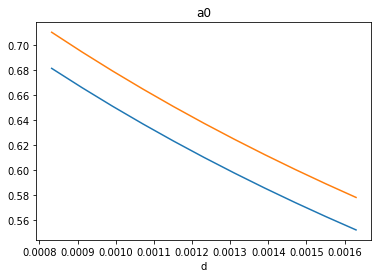

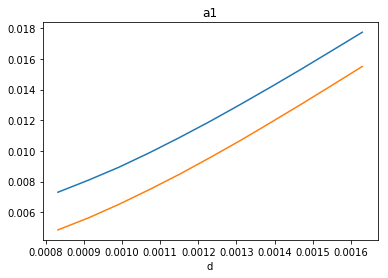

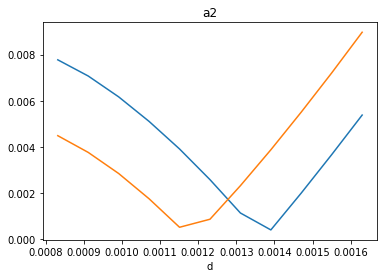

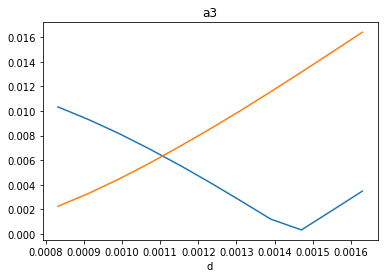

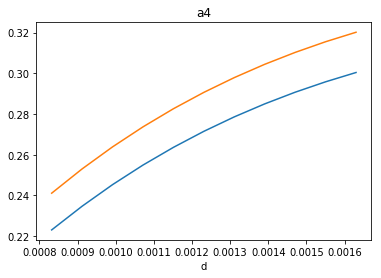

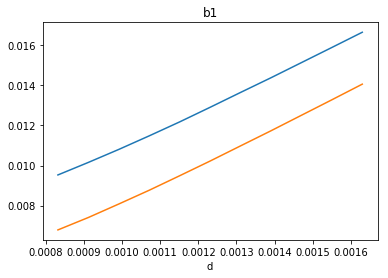

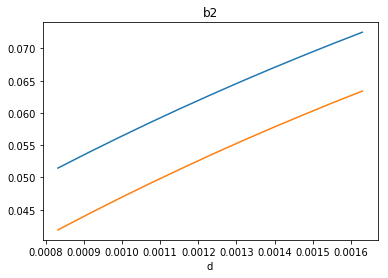

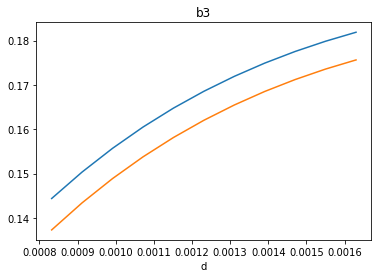

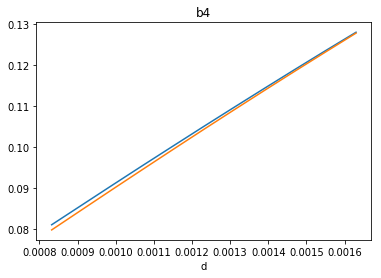

In [10]:
# Saudável
d = .000832
de = 0.0268
f = 0.115

# Com Tumor
dT = 0.00163
deT = 0.00723
fT = 0.0953

label = 'd'
print('Com f=', f, ' e de=', de)
lista = ds

plt.figure(), plt.plot(lista, a0sd)
plt.plot(lista, a0sdT)
plt.title('a0')
plt.xlabel(label)

plt.figure(), plt.plot(lista, a1sd)
plt.plot(lista, a1sdT)
plt.title('a1')
plt.xlabel(label)

plt.figure(), plt.plot(lista, a2sd)
plt.plot(lista, a2sdT)
plt.title('a2')
plt.xlabel(label)

plt.figure(), plt.plot(lista, a3sd)
plt.plot(lista, a3sdT)
plt.title('a3')
plt.xlabel(label)

plt.figure(), plt.plot(lista, a4sd)
plt.plot(lista, a4sdT)
plt.title('a4')
plt.xlabel(label)

plt.figure(), plt.plot(lista, b1sd)
plt.plot(lista, b1sdT)
plt.title('b1')
plt.xlabel(label)

plt.figure(), plt.plot(lista, b2sd)
plt.plot(lista, b2sdT)
plt.title('b2')
plt.xlabel(label)

plt.figure(), plt.plot(lista, b3sd)
plt.plot(lista, b3sdT)
plt.title('b3')
plt.xlabel(label)

plt.figure(), plt.plot(lista, b4sd)
plt.plot(lista, b4sdT)
plt.title('b4')
plt.xlabel(label)

In [11]:
# Saudável
d = .000832
de = 0.0268
f = 0.115

# Com Tumor
dT = 0.00163
deT = 0.00723
fT = 0.0953

a0sde = []
a1sde = []
a2sde = []
a3sde = []
a4sde = []
b1sde = []
b2sde = []
b3sde = []
b4sde = []

a0sdeT = []
a1sdeT = []
a2sdeT = []
a3sdeT = []
a4sdeT = []
b1sdeT = []
b2sdeT = []
b3sdeT = []
b4sdeT = []

for de in des:
    sinal = []
    for element in b:
        sinal.append(a*(f*np.exp(-element*de) + (1-f)*np.exp(-element*d)))

    erroVec3 = list()
    a0prg = list()
    a1prg = list()
    a2prg = list()
    a3prg = list()
    a4prg = list()
    b1prg = list()
    b2prg = list()
    b3prg = list()
    b4prg = list()

    execucoes = 100

    for SNR in SNRs[1:]:
        a0pr = np.empty(0)
        a1pr = np.empty(0)
        a2pr = np.empty(0)
        a3pr = np.empty(0)
        a4pr = np.empty(0)
        b1pr = np.empty(0)
        b2pr = np.empty(0)
        b3pr = np.empty(0)
        b4pr = np.empty(0)

        errom = 0;
        k = 0
        nconv = 0
        success = True
        while (k <= execucoes):
            try:
                sinalR = createRici(SNR)
                sinalR = sinalR/sinalR[0]

                data = np.empty(0)
                x = np.empty(0)

                for i in range(0,11):
                    data = np.append(data, sinalR[i])
                    x = np.append(x, b[i])

                params = Parameters()
                params.add('a0', value=0)
                params.add('a1', value=0)
                params.add('a2', value=0)
                params.add('a3', value=0)
                params.add('a4', value=0)
                params.add('b1', value=0)
                params.add('b2', value=0)
                params.add('b3', value=0)
                params.add('b4', value=0)

                minner = Minimizer(func5, params, fcn_args=(x, data))
                # Convergencia em leastsq, tnc, trust-exact, trust-krylov, trust-constr
                estR = minner.minimize()
                a0Est = abs(estR.params['a0'].value)
                a1Est = abs(estR.params['a1'].value)
                a2Est = abs(estR.params['a2'].value)
                a3Est = abs(estR.params['a3'].value)
                a4Est = abs(estR.params['a4'].value)
                b1Est = abs(estR.params['b1'].value)
                b2Est = abs(estR.params['b2'].value)
                b3Est = abs(estR.params['b3'].value)
                b4Est = abs(estR.params['b4'].value)

                a0pr = np.append(a0pr, a0Est)
                a1pr = np.append(a1pr, a1Est)
                a2pr = np.append(a2pr, a2Est)
                a3pr = np.append(a3pr, a3Est)
                a4pr = np.append(a4pr, a4Est)
                b1pr = np.append(b1pr, b1Est)
                b2pr = np.append(b2pr, b2Est)
                b3pr = np.append(b3pr, b3Est)
                b4pr = np.append(b4pr, b4Est)

                k = k + 1
                # Calcular erro
                sinalPlot = []
                for x in b:
                    sinalPlot.append( a0Est + (a1Est)*np.sin(x * 2*np.pi/freq1) + (a2Est)*np.sin(x * 2*np.pi/freq2) + (a3Est)*np.sin(x * 2*np.pi/freq3) + a4Est*np.sin(x*2*np.pi/freq4) +
                          (b1Est)*np.cos(x * 2*np.pi/freq1) + (b2Est)*np.cos(x * 2*np.pi/freq2) + (b3Est)*np.cos(x * 2*np.pi/freq3) + b4Est*np.cos(x*2*np.pi/freq4))

                erro = 0
                for i in range(len(sinal)):
                    erro = erro + abs(sinal[i]-sinalPlot[i])

                errom = errom + erro/execucoes

            except:
                nconv = nconv + 1
                if(nconv > execucoes):
                    print("Não houve convergência em mais de 50% dos casos. Parando a execução.\n")
                    print("Execuções bem sucedidas: " + str(k))
                    success = False;
                    break

        a0prg.append(a0pr)
        a1prg.append(a1pr)
        a2prg.append(a2pr)
        a3prg.append(a3pr)
        a4prg.append(a4pr)
        b1prg.append(b1pr)
        b2prg.append(b2pr)
        b3prg.append(b3pr)
        b4prg.append(b4pr)
        #print("Com SNR = ", SNR)

        if (success):
            erroVec3.append(errom)
           # print("Erro: ", errom)
            print('Storing for de = ', de)
           # print("1 - Parâmetro 'a0': Média ("+ str(np.mean(a0pr)) +")")
           # print("2 - Parâmetro 'a1': Média ("+ str(np.mean(a1pr)) +")")
           # print("3 - Parâmetro 'a2': Média ("+ str(np.mean(a2pr)) +")")
           # print("4 - Parâmetro 'a3': Média ("+ str(np.mean(a3pr)) +")")
           # print("5 - Parâmetro 'b1': Média ("+ str(np.mean(b1pr)) +")")
           # print("6 - Parâmetro 'b2': Média ("+ str(np.mean(b2pr)) +")")
           # print("7 - Parâmetro 'b3': Média ("+ str(np.mean(b3pr)) +")")
           # print("8 - Parâmetro 'b4': Média ("+ str(np.mean(b4pr)) +")")

            #print("1 - Parâmetro 'a0': Mediana ("+ str(np.median(a0pr)) +")")
            #print("2 - Parâmetro 'a1': Mediana ("+ str(np.median(a1pr)) +")")
            #print("3 - Parâmetro 'a2': Mediana ("+ str(np.median(a2pr)) +")")
            #print("4 - Parâmetro 'a3': Mediana ("+ str(np.median(a3pr)) +")")
            #print("4 - Parâmetro 'a4': Mediana ("+ str(np.median(a4pr)) +")")
            #print("5 - Parâmetro 'b1': Mediana ("+ str(np.median(b1pr)) +")")
            #print("6 - Parâmetro 'b2': Mediana ("+ str(np.median(b2pr)) +")")
            #print("7 - Parâmetro 'b3': Mediana ("+ str(np.median(b3pr)) +")")
            #print("8 - Parâmetro 'b4': Mediana ("+ str(np.median(b4pr)) +")")

           # print("Não houve convergência em " + str(nconv/(nconv + 1000)) + "% dos casos.")
            a0sde.append(np.median(a0pr))
            a1sde.append(np.median(a1pr))
            a2sde.append(np.median(a2pr))
            a3sde.append(np.median(a3pr))
            a4sde.append(np.median(a4pr))
            b1sde.append(np.median(b1pr))
            b2sde.append(np.median(b2pr))
            b3sde.append(np.median(b3pr))
            b4sde.append(np.median(b4pr))
            
for de in des:
    sinal = []
    for element in b:
        sinal.append(a*(fT*np.exp(-element*de) + (1-fT)*np.exp(-element*dT)))

    erroVec3 = list()
    a0prg = list()
    a1prg = list()
    a2prg = list()
    a3prg = list()
    a4prg = list()
    b1prg = list()
    b2prg = list()
    b3prg = list()
    b4prg = list()

    execucoes = 100

    for SNR in SNRs[1:]:
        a0pr = np.empty(0)
        a1pr = np.empty(0)
        a2pr = np.empty(0)
        a3pr = np.empty(0)
        a4pr = np.empty(0)
        b1pr = np.empty(0)
        b2pr = np.empty(0)
        b3pr = np.empty(0)
        b4pr = np.empty(0)

        errom = 0;
        k = 0
        nconv = 0
        success = True
        while (k <= execucoes):
            try:
                sinalR = createRici(SNR)
                sinalR = sinalR/sinalR[0]

                data = np.empty(0)
                x = np.empty(0)

                for i in range(0,11):
                    data = np.append(data, sinalR[i])
                    x = np.append(x, b[i])

                params = Parameters()
                params.add('a0', value=0)
                params.add('a1', value=0)
                params.add('a2', value=0)
                params.add('a3', value=0)
                params.add('a4', value=0)
                params.add('b1', value=0)
                params.add('b2', value=0)
                params.add('b3', value=0)
                params.add('b4', value=0)

                minner = Minimizer(func5, params, fcn_args=(x, data))
                # Convergencia em leastsq, tnc, trust-exact, trust-krylov, trust-constr
                estR = minner.minimize()
                a0Est = abs(estR.params['a0'].value)
                a1Est = abs(estR.params['a1'].value)
                a2Est = abs(estR.params['a2'].value)
                a3Est = abs(estR.params['a3'].value)
                a4Est = abs(estR.params['a4'].value)
                b1Est = abs(estR.params['b1'].value)
                b2Est = abs(estR.params['b2'].value)
                b3Est = abs(estR.params['b3'].value)
                b4Est = abs(estR.params['b4'].value)

                a0pr = np.append(a0pr, a0Est)
                a1pr = np.append(a1pr, a1Est)
                a2pr = np.append(a2pr, a2Est)
                a3pr = np.append(a3pr, a3Est)
                a4pr = np.append(a4pr, a4Est)
                b1pr = np.append(b1pr, b1Est)
                b2pr = np.append(b2pr, b2Est)
                b3pr = np.append(b3pr, b3Est)
                b4pr = np.append(b4pr, b4Est)

                k = k + 1
                # Calcular erro
                sinalPlot = []
                for x in b:
                    sinalPlot.append( a0Est + (a1Est)*np.sin(x * 2*np.pi/freq1) + (a2Est)*np.sin(x * 2*np.pi/freq2) + (a3Est)*np.sin(x * 2*np.pi/freq3) + a4Est*np.sin(x*2*np.pi/freq4) +
                          (b1Est)*np.cos(x * 2*np.pi/freq1) + (b2Est)*np.cos(x * 2*np.pi/freq2) + (b3Est)*np.cos(x * 2*np.pi/freq3) + b4Est*np.cos(x*2*np.pi/freq4))

                erro = 0
                for i in range(len(sinal)):
                    erro = erro + abs(sinal[i]-sinalPlot[i])

                errom = errom + erro/execucoes

            except:
                nconv = nconv + 1
                if(nconv > execucoes):
                    print("Não houve convergência em mais de 50% dos casos. Parando a execução.\n")
                    print("Execuções bem sucedidas: " + str(k))
                    success = False;
                    break

        a0prg.append(a0pr)
        a1prg.append(a1pr)
        a2prg.append(a2pr)
        a3prg.append(a3pr)
        a4prg.append(a4pr)
        b1prg.append(b1pr)
        b2prg.append(b2pr)
        b3prg.append(b3pr)
        b4prg.append(b4pr)
        #print("Com SNR = ", SNR)

        if (success):
            erroVec3.append(errom)
           # print("Erro: ", errom)
            print('Storing for de = ', de)
           # print("1 - Parâmetro 'a0': Média ("+ str(np.mean(a0pr)) +")")
           # print("2 - Parâmetro 'a1': Média ("+ str(np.mean(a1pr)) +")")
           # print("3 - Parâmetro 'a2': Média ("+ str(np.mean(a2pr)) +")")
           # print("4 - Parâmetro 'a3': Média ("+ str(np.mean(a3pr)) +")")
           # print("5 - Parâmetro 'b1': Média ("+ str(np.mean(b1pr)) +")")
           # print("6 - Parâmetro 'b2': Média ("+ str(np.mean(b2pr)) +")")
           # print("7 - Parâmetro 'b3': Média ("+ str(np.mean(b3pr)) +")")
           # print("8 - Parâmetro 'b4': Média ("+ str(np.mean(b4pr)) +")")

            #print("1 - Parâmetro 'a0': Mediana ("+ str(np.median(a0pr)) +")")
            #print("2 - Parâmetro 'a1': Mediana ("+ str(np.median(a1pr)) +")")
            #print("3 - Parâmetro 'a2': Mediana ("+ str(np.median(a2pr)) +")")
            #print("4 - Parâmetro 'a3': Mediana ("+ str(np.median(a3pr)) +")")
            #print("4 - Parâmetro 'a4': Mediana ("+ str(np.median(a4pr)) +")")
            #print("5 - Parâmetro 'b1': Mediana ("+ str(np.median(b1pr)) +")")
            #print("6 - Parâmetro 'b2': Mediana ("+ str(np.median(b2pr)) +")")
            #print("7 - Parâmetro 'b3': Mediana ("+ str(np.median(b3pr)) +")")
            #print("8 - Parâmetro 'b4': Mediana ("+ str(np.median(b4pr)) +")")

           # print("Não houve convergência em " + str(nconv/(nconv + 1000)) + "% dos casos.")
            a0sdeT.append(np.median(a0pr))
            a1sdeT.append(np.median(a1pr))
            a2sdeT.append(np.median(a2pr))
            a3sdeT.append(np.median(a3pr))
            a4sdeT.append(np.median(a4pr))
            b1sdeT.append(np.median(b1pr))
            b2sdeT.append(np.median(b2pr))
            b3sdeT.append(np.median(b3pr))
            b4sdeT.append(np.median(b4pr))
            
print('Values stored')

Storing for de =  0.0268
Storing for de =  0.024843
Storing for de =  0.022886
Storing for de =  0.020929
Storing for de =  0.018972000000000003
Storing for de =  0.017015000000000002
Storing for de =  0.015058
Storing for de =  0.013101000000000002
Storing for de =  0.011144000000000001
Storing for de =  0.009187
Storing for de =  0.00723
Storing for de =  0.0268
Storing for de =  0.024843
Storing for de =  0.022886
Storing for de =  0.020929
Storing for de =  0.018972000000000003
Storing for de =  0.017015000000000002
Storing for de =  0.015058
Storing for de =  0.013101000000000002
Storing for de =  0.011144000000000001
Storing for de =  0.009187
Storing for de =  0.00723
Values stored


Com f= 0.115  e d= 0.000832
-0.08172850980134022
-0.07854422952641657
-0.0801363696638784


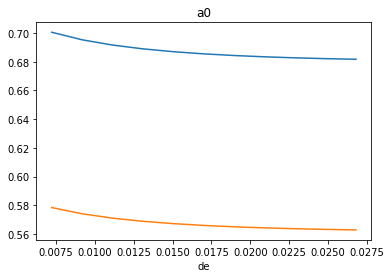

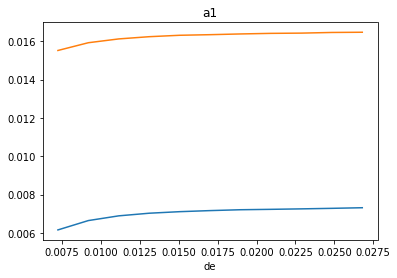

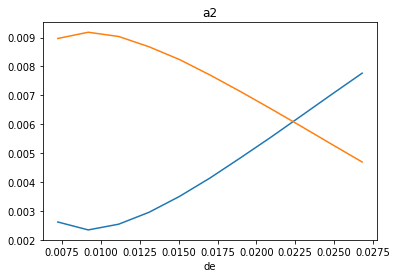

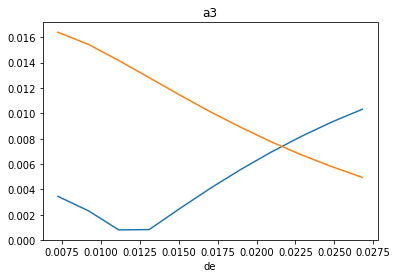

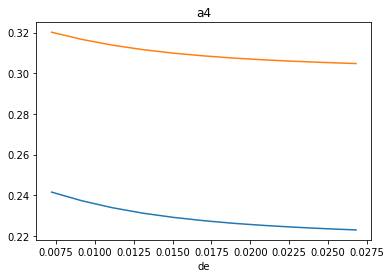

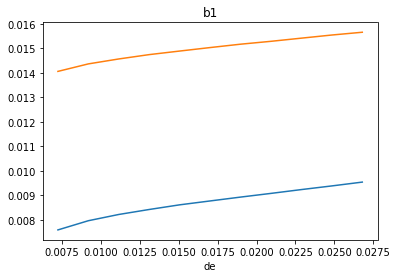

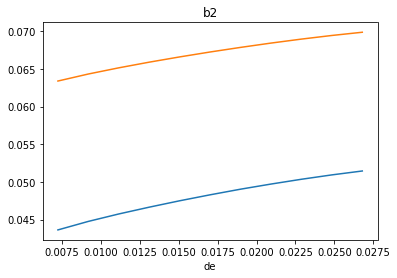

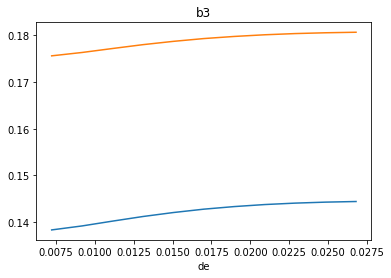

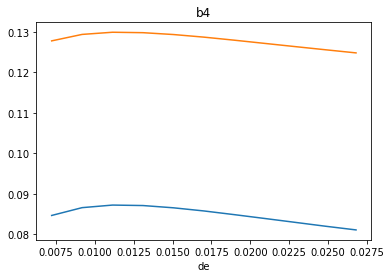

In [12]:
# Saudável
d = .000832
de = 0.0268
f = 0.115

# Com Tumor
dT = 0.00163
deT = 0.00723
fT = 0.0953

label = 'de'
print('Com f=', f, ' e d=', d)
lista = des

plt.figure(), plt.plot(lista, a0sde)
plt.plot(lista, a0sdeT)
plt.title('a0')
plt.xlabel(label)

plt.figure(), plt.plot(lista, a1sde)
plt.plot(lista, a1sdeT)
plt.title('a1')
plt.xlabel(label)

plt.figure(), plt.plot(lista, a2sde)
plt.plot(lista, a2sdeT)
plt.title('a2')
plt.xlabel(label)

plt.figure(), plt.plot(lista, a3sde)
plt.plot(lista, a3sdeT)
plt.title('a3')
plt.xlabel(label)

plt.figure(), plt.plot(lista, a4sde)
plt.plot(lista, a4sdeT)
plt.title('a4')
plt.xlabel(label)

plt.figure(), plt.plot(lista, b1sde)
plt.plot(lista, b1sdeT)
plt.title('b1')
plt.xlabel(label)

plt.figure(), plt.plot(lista, b2sde)
plt.plot(lista, b2sdeT)
plt.title('b2')
plt.xlabel(label)

plt.figure(), plt.plot(lista, b3sde)
plt.plot(lista, b3sdeT)
plt.title('b3')
plt.xlabel(label)

plt.figure(), plt.plot(lista, b4sde)
plt.plot(lista, b4sdeT)
plt.title('b4')
plt.xlabel(label)

print (a4sde[0] - a4sdeT[0])
print (a4sde[-1] - a4sdeT[-1])
print (((a4sde[-1] - a4sdeT[-1])+(a4sde[0] - a4sdeT[0]))/2 )

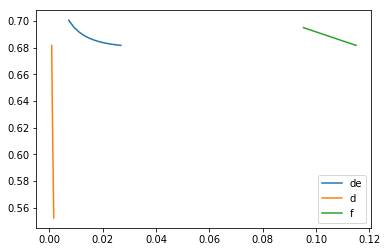

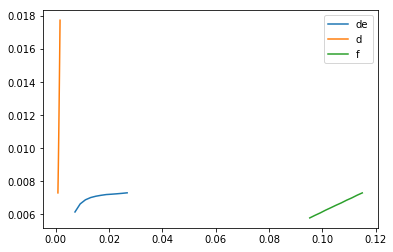

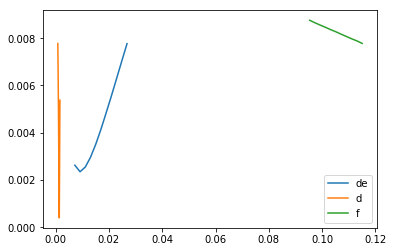

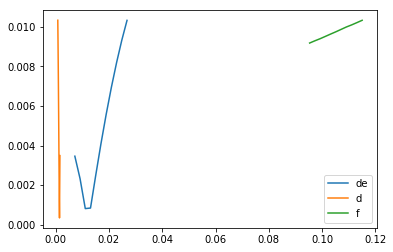

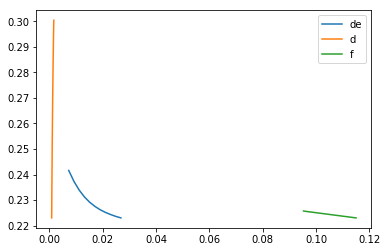

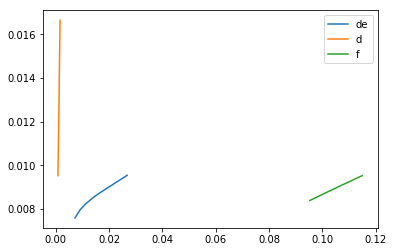

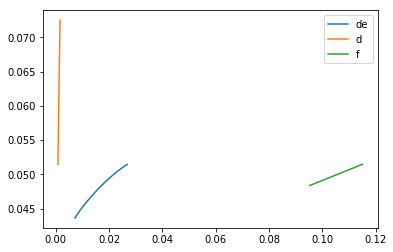

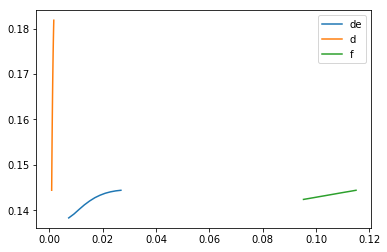

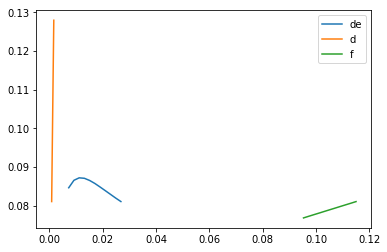

In [13]:
# Saudável
d = .000832
de = 0.0268
f = 0.115

# Com Tumor
dT = 0.00163
deT = 0.00723
fT = 0.0953

labels = ('de', 'd', 'f')

plt.figure(), plt.plot(des, a0sde, ds, a0sd, fs, a0sf)
plt.legend(labels)

plt.figure(), plt.plot(des, a1sde, ds, a1sd, fs, a1sf)
plt.legend(labels)

plt.figure(), plt.plot(des, a2sde, ds, a2sd, fs, a2sf)
plt.legend(labels)

plt.figure(), plt.plot(des, a3sde, ds, a3sd, fs, a3sf)
plt.legend(labels)

plt.figure(), plt.plot(des, a4sde, ds, a4sd, fs, a4sf)
plt.legend(labels)

plt.figure(), plt.plot(des, b1sde, ds, b1sd, fs, b1sf)
plt.legend(labels)

plt.figure(), plt.plot(des, b2sde, ds, b2sd, fs, b2sf)
plt.legend(labels)

plt.figure(), plt.plot(des, b3sde, ds, b3sd, fs, b3sf)
plt.legend(labels)

plt.figure(), plt.plot(des, b4sde, ds, b4sd, fs, b4sf)

plt.legend(labels)

In [14]:
# Saudável
#d = 0.000832
#de = 0.0268
#f = 0.115

# Com Tumor
#dT = 0.00163
#deT = 0.00723
#fT = 0.0953

# Saudável
b4 = 0.081
b3 = 0.144
a0 = 0.682

# Com Tumor
#b4 = 0.1277
#b3 = 0.176
#a0 = 0.578

# Cálculo de d com b4
dCal = 0.0168*(b4-0.0805)+0.000832
print(dCal)

# Cálculo de de com b3
# Calcula subida
s = dCal/0.021 - 0.000832/0.021
#print(s)
# Aplica correção e calcula de
deCal = 3.51077*((b3-s) - 0.138) + 0.00723
print(deCal)

# Cálculo de f com a0
# Correção com d
s1 = 6.64282*(deCal-0.0268) + 0.695 - 0.565
s2 = -21.3033*(dCal-0.000832) + 0.712 - 0.695
#print(s1)
#print(s2)
a0 = a0 - s1 - s2
fCal = -0.5*(a0 - 0.573) + 0.0953
print(fCal)

0.0008403999999999999
0.02689031199999998
0.11451048931991986
